### Импорты, форматы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [8,5]

In [2]:
import os
PATH="../input/"
print(os.listdir(PATH))

['sample_submit_zero.csv', 'test_data.csv', 'train_answers.csv', 'train_data.csv']


In [3]:
train = pd.read_csv(PATH + 'train_data.csv',)
test = pd.read_csv(PATH + 'test_data.csv',)
train_answers = pd.read_csv(PATH + 'train_answers.csv',)
submission = pd.read_csv(PATH + 'sample_submit_zero.csv', header=None)
print ("формат обучающей выборки:", train.shape)
print ("формат тестовой выборки:", test.shape) 
print ("формат ответов по трейну:", train_answers.shape) 
print ("формат образца сабмишена:", submission.shape) 

формат обучающей выборки: (5337, 6)
формат тестовой выборки: (3615, 6)
формат ответов по трейну: (943, 5)
формат образца сабмишена: (630, 5)


#### Трейн

In [4]:
train.head(10)

,userId,itemId,Xmin,Ymin,Xmax,Ymax
0,1164,6132,62,656,276,803
1,1399,6132,184,662,235,740
2,1694,6132,63,648,272,830
3,916,6132,111,637,253,831
4,1621,6132,60,651,242,819
5,1092,6132,39,649,249,825
6,301,31297,29,393,126,487
7,1508,31297,25,399,120,485
8,535,31297,25,399,108,472
9,254,18168,209,739,534,1051


#### Тест

In [5]:
test.head(10)

,userId,itemId,Xmin,Ymin,Xmax,Ymax
0,1581,34804,86,640,242,743
1,1351,34804,85,655,273,766
2,161,34804,85,648,268,748
3,313,5704,32,618,647,1268
4,1097,5704,25,620,602,1242
5,1525,5704,118,690,583,1191
6,957,32082,50,437,259,575
7,947,32082,42,414,252,583
8,237,32082,63,424,250,569
9,191,32082,59,483,262,584


#### Ответы на тест - ground truth

In [6]:
train_answers.head()

,itemId,Xmin_true,Ymin_true,Xmax_true,Ymax_true
0,5,198,827,649,1340
1,10,26,605,433,847
2,13,233,698,622,920
3,30,61,368,329,530
4,32,30,536,328,813


#### Нулевой сабмишен

In [7]:
submission.head()

,0,1,2,3,4
0,18,0,0,0,0
1,19,0,0,0,0
2,33,0,0,0,0
3,62,0,0,0,0
4,114,0,0,0,0


#### исследование файлов

In [8]:
submission[0].nunique()

630

In [9]:
test.itemId.nunique()

630

**итого уникальных айтемов в сабмишене и в тесте - 630**

**Посмотрим распределение кол-ва оценок по каждому айтему**

**тест**

In [10]:
test_counts = test.groupby('itemId').count().userId

(array([  1., 220.,  17.,  64.,  99.,  61.,  56.,  57.,  31.,  17.,   6.,
          1.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]),
 <a list of 12 Patch objects>)

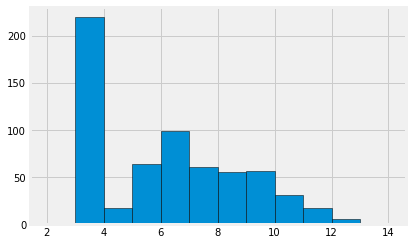

In [11]:
plt.hist(test_counts, edgecolor = 'k', bins = 12)

In [12]:
test_counts.value_counts()[:1]

3    220
Name: userId, dtype: int64

In [13]:
test_counts.value_counts()[1:].sum()

410

**Итого: 220 случаев 3х оценок, суммарно 410 всех  остальных оценок по тесту**

**трейн**

In [14]:
train_counts = train.groupby('itemId').count().userId
len(train_counts)

943

In [15]:
train_counts.max()

24

(array([358.,  23.,  92., 148.,  85.,  65.,  87.,  50.,  22.,   7.,   2.,
          0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
        16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 21 Patch objects>)

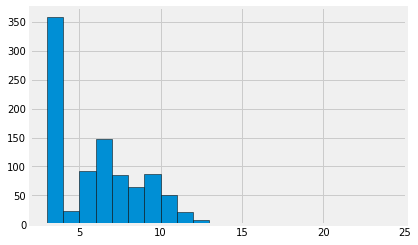

In [16]:
plt.hist(train_counts, edgecolor = 'k', bins = 21)

In [17]:
train_counts.value_counts()[:1]

3    358
Name: userId, dtype: int64

In [18]:
train_counts.value_counts()[1:].sum()

585

**Итого: 358 случаев 3х оценок, суммарно 585 всех  остальных оценок по трейну**

Создадим сабмишен с mean по каждому значению

In [19]:
submission_mean = test.groupby('itemId').mean()
submission_mean.drop('userId', axis=1, inplace=True)
submission_mean = submission_mean.astype(int)
submission_mean.insert(loc=0, column='ID', value = submission_mean.index)

In [20]:
submission_mean.head()

,ID,Xmin,Ymin,Xmax,Ymax
itemId,,,,,
18,18,135,704,729,1071
19,19,29,560,114,725
33,33,46,393,374,633
62,62,90,964,564,1167
114,114,63,575,207,767


In [21]:
submission_mean.to_csv('submission_mean.csv', index=False, header=False)

**результат посылки средних значений П: 0.5037841**

**сравним юзеров по тесту и трейну**

In [22]:
print("юзеров в трейне: ", train.userId.nunique())
print("юзеров в тесте: ", test.userId.nunique())

юзеров в трейне:  1357
юзеров в тесте:  1192


In [23]:
train_users = train.groupby('userId').count().index
test_users = test.groupby('userId').count().index

In [24]:
unique_users_test = []
unique_users_train = []

for i in test_users:
    if not (i in train_users):
        unique_users_test.append(i)
        
for i in train_users:
    if not (i in test_users):
        unique_users_train.append(i)
        
print("уникальных юзеров в тесте: ", len(unique_users_test))
print("уникальных юзеров в трейне: ",len(unique_users_train))   

уникальных юзеров в тесте:  191
уникальных юзеров в трейне:  356


**таким образом, юзеры теста и трейна пересекаются, но не совпадают.**

**попробуем очистить данные, устранив выбросы**

In [25]:
#функция считает среднее по оценкам, и исключает 

def mymean(data):
    
    # сюда будем писать результаты
    
    df_ans = data.max()

    for col in ['Xmin', 'Ymin', 'Xmax', 'Ymax']:
        # data[col] - pandas series, набор значений по координате. Задача - вычислить его mean без аутлаеров
        
        std = data[col].std()
        mean = data[col].mean()
        temp_col = []
        
        # пройдем по значениям столбца и если значение лежит меньше, чем в std*0.85 - то добавим его во временный столбец        
        
        for i in data[col]:
            if abs(mean - i) < std*0.8:
                temp_col.append(i)
                
        #если в столбец ниего вообще не попало - возьмем среднее как есть. Если там что-то есть - то возьмем то, что нашли
                
        if len(temp_col) > 0:
            ans = np.array(temp_col).mean()
        else:
            ans = data[col].mean()
                   
        
        # ans нужно в итоге присвоить то, что пойдет в таблицу
        #ans = data[col].mean()
        
        df_ans[col] = ans
        
    return df_ans

In [26]:
submission_mymean = test.groupby('itemId').apply(mymean)
submission_mymean.drop('userId', axis=1, inplace=True)
submission_mymean = submission_mymean.astype(int)
#submission_mymean.insert(loc=0, column='ID', value = submission_mymean.index)

In [27]:
submission_mymean.head(10)

,itemId,Xmin,Ymin,Xmax,Ymax
itemId,,,,,
18,18,135,704,729,1071
19,19,27,559,112,727
33,33,43,384,365,629
62,62,90,975,613,1166
114,114,69,575,210,760
146,146,72,481,559,816
156,156,87,802,155,879
163,163,30,322,212,461
164,164,5,149,349,649


In [28]:
submission_mymean.to_csv('submission0-8.csv', index=False, header=False)

**Решение с обрезкой по 0.8 (наилучшее) дает П: 0.5115125**

**Мимакс - возьмем минимальное Xmin Ymin и максимальное Xmax Ymax в тесте**

In [29]:
#функция берет минимальное и максимальное по разным столбцам 

def myminmax(data):
    
    # сюда будем писать результаты

    df_ans = data.max()
    
    # банально выберем минимумы и максимумы

    for col in ['Xmin', 'Ymin', 'Xmax', 'Ymax']:
        # data[col] - pandas series, набор значений по координате. Задача - вычислить его mean без аутлаеров
        
        if col == 'Xmin' or col == "Ymin":
            df_ans[col] = data[col].min()
            
        if col == 'Xmax' or col == "Ymax":
            df_ans[col] = data[col].max()

    return df_ans

In [30]:
submission_myminmax = test.groupby('itemId').apply(myminmax)
submission_myminmax.drop('userId', axis=1, inplace=True)
submission_myminmax = submission_myminmax.astype(int)

**посмотрим визуально, что получилось**

In [31]:
test.sort_values(by="itemId").head(10)

,userId,itemId,Xmin,Ymin,Xmax,Ymax
1230,903,18,126,774,694,1010
1231,1723,18,144,634,764,1132
523,903,19,28,559,113,721
522,141,19,34,564,119,729
521,1723,19,27,559,112,727
2034,366,33,21,380,414,652
2035,1565,33,43,388,365,629
2036,141,33,75,413,345,620
2890,1508,62,98,1054,553,1259
2893,141,62,125,980,623,1130


In [32]:
submission_myminmax.head(10)

,itemId,Xmin,Ymin,Xmax,Ymax
itemId,,,,,
18,18,126,634,764,1132
19,19,27,559,119,729
33,33,21,380,414,652
62,62,35,824,639,1262
114,114,41,570,216,780
146,146,17,211,643,1118
156,156,74,802,160,887
163,163,21,317,213,465
164,164,4,146,401,681


**вроде работает. Загрузим**

In [33]:
submission_myminmax.to_csv('submission_minmax_simple.csv', index=False, header=False)

**результат простого минмакса - П: 0.5678444** (и таких результатов довольно много)

**Напишем тот же минмакс, но с выкидыванием аутлаеров свыше 0,8std**

In [34]:
#функция берет минимальное и максимальное по разным столбцам, выкидываая аутлаеров 

def myminmax_filtered(data):
    
    # сюда будем писать результаты

    df_ans = data.max()
    
    # банально выберем минимумы и максимумы

    for col in ['Xmin', 'Ymin', 'Xmax', 'Ymax']:
        # data[col] - pandas series, набор значений по координате. Задача - вычислить его mean без аутлаеров
        
        std = data[col].std()
        mean = data[col].mean()
        temp_col = []
        
        # пройдем по значениям столбца и если значение лежит меньше, чем в std*0.85 - то добавим его во временный столбец        
        
        for i in data[col]:
            if abs(mean - i) < std*0.8:
                temp_col.append(i)
                
        # Если в итоге в темп ничего не залетело - возьмем как есть
        
        if len(temp_col) < 1:
        
            if col == 'Xmin' or col == "Ymin":
                df_ans[col] = data[col].min()

            if col == 'Xmax' or col == "Ymax":
                df_ans[col] = data[col].max()
                
        else:
            
            if col == 'Xmin' or col == "Ymin":
                df_ans[col] = min(temp_col)

            if col == 'Xmax' or col == "Ymax":
                df_ans[col] =  max(temp_col)

    return df_ans

In [35]:
submission_myminmax_filtered = test.groupby('itemId').apply(myminmax_filtered)
submission_myminmax_filtered.drop('userId', axis=1, inplace=True)
submission_myminmax_filtered = submission_myminmax_filtered.astype(int)

In [36]:
submission_myminmax_filtered.to_csv('submission_minmax_filtered_0-8.csv', index=False, header=False)

**результат П: 0.5270054 - снижение**

**вычислим по трейну юзеров, которые ошибаются сильнее всего**

In [37]:
train_merged = pd.merge(train, train_answers, how='inner', on = 'itemId')

In [38]:
train_merged.head(10)

,userId,itemId,Xmin,Ymin,Xmax,Ymax,Xmin_true,Ymin_true,Xmax_true,Ymax_true
0,1164,6132,62,656,276,803,47,650,213,812
1,1399,6132,184,662,235,740,47,650,213,812
2,1694,6132,63,648,272,830,47,650,213,812
3,916,6132,111,637,253,831,47,650,213,812
4,1621,6132,60,651,242,819,47,650,213,812
5,1092,6132,39,649,249,825,47,650,213,812
6,301,31297,29,393,126,487,18,390,122,472
7,1508,31297,25,399,120,485,18,390,122,472
8,535,31297,25,399,108,472,18,390,122,472
9,254,18168,209,739,534,1051,35,713,656,1082


In [39]:
train_merged["mse"] = ((train_merged.Xmin - train_merged.Xmin_true)**2 + (train_merged.Xmax - train_merged.Xmax_true)**2\
                       + (train_merged.Ymin - train_merged.Ymin_true)**2 + (train_merged.Ymax - train_merged.Ymax_true)**2)/4

In [40]:
train_merged.head()

,userId,itemId,Xmin,Ymin,Xmax,Ymax,Xmin_true,Ymin_true,Xmax_true,Ymax_true,mse
0,1164,6132,62,656,276,803,47,650,213,812,1077.75
1,1399,6132,184,662,235,740,47,650,213,812,6145.25
2,1694,6132,63,648,272,830,47,650,213,812,1016.25
3,916,6132,111,637,253,831,47,650,213,812,1556.50
4,1621,6132,60,651,242,819,47,650,213,812,265.00


**юзеры трейна, отранжированные по фейлам**

In [41]:
user_fails = train_merged.groupby('userId').mean().mse.sort_values(ascending=False)
user_fails.head(20)

userId
1019    217615.750000
671     202095.000000
388     174108.625000
344     147222.250000
533     127838.750000
1615    126893.500000
569     121956.750000
333     118177.500000
688     109075.250000
1002    103343.750000
915      98982.625000
417      83625.375000
921      81811.833333
862      78676.750000
1494     78217.250000
797      77012.250000
1546     72952.083333
719      72224.750000
1364     71290.750000
305      70077.125000
Name: mse, dtype: float64

In [42]:
user_fails.index

Int64Index([1019,  671,  388,  344,  533, 1615,  569,  333,  688, 1002,
            ...
             361,  718,  758, 1050,  693,   35, 1230,   41, 1539,   77],
           dtype='int64', name='userId', length=1357)

**sanity check - то же самое, но без квадрата, по модулю**

In [43]:
train_merged2 = pd.merge(train, train_answers, how='inner', on = 'itemId')
train_merged2["mse"] = (abs(train_merged.Xmin - train_merged.Xmin_true) + abs(train_merged.Xmax - train_merged.Xmax_true)\
                       + abs(train_merged.Ymin - train_merged.Ymin_true) + abs(train_merged.Ymax - train_merged.Ymax_true))/4
user_fails2 = train_merged2.groupby('userId').mean().mse.sort_values(ascending=False)
sum(user_fails2.index == user_fails.index)

26

**удалим из теста 10 самых фейлящих юзеров**

In [44]:
test.shape

(3615, 6)

In [45]:
test_nofails10 = test[~test["userId"].isin(user_fails.index[0:10])]

test_nofails10.shape

(3605, 6)

In [46]:
submission_nofails = test.groupby('itemId').apply(myminmax)
submission_nofails.drop('userId', axis=1, inplace=True)
submission_nofails = submission_nofails.astype(int)
submission_nofails.to_csv('submission_nofails10.csv', index=False, header=False)

**10 - нет улучшения. !!! ошибка!!! перезалить!!!**

In [47]:
def save_nofails(threshold, test=test, user_fails=user_fails):
    test_nofails = test[~test["userId"].isin(user_fails.index[0:threshold])]
    submission_nofails = test_nofails.groupby('itemId').apply(myminmax)
    submission_nofails.drop('userId', axis=1, inplace=True)
    submission_nofails = submission_nofails.astype(int)
    submission_nofails.to_csv('submission_nofails' + str(threshold) + '.csv', index=False, header=False)
    print(threshold, test_nofails.shape)

In [48]:
for i in [10, 100]:
    save_nofails(i)

10 (3605, 6)
100 (3467, 6)


- 10 - П: 0.5678450 !!!
- 20 - П: 0.5678450 !!
- 30 - П: 0.5677362
- 40 - П: 0.5677362
- 50 - П: 0.5678378

In [49]:
for i in [4, 5, 6, 9]:
    save_nofails(i)

4 (3610, 6)
5 (3608, 6)
6 (3607, 6)
9 (3606, 6)


In [50]:
submission_nofails.head(10)

,itemId,Xmin,Ymin,Xmax,Ymax
itemId,,,,,
18,18,126,634,764,1132
19,19,27,559,119,729
33,33,21,380,414,652
62,62,35,824,639,1262
114,114,41,570,216,780
146,146,17,211,643,1118
156,156,74,802,160,887
163,163,21,317,213,465
164,164,4,146,401,681


In [51]:
submission_nofails.Ymax -= 1

In [52]:
submission_nofails.head(10)

,itemId,Xmin,Ymin,Xmax,Ymax
itemId,,,,,
18,18,126,634,764,1131
19,19,27,559,119,728
33,33,21,380,414,651
62,62,35,824,639,1261
114,114,41,570,216,779
146,146,17,211,643,1117
156,156,74,802,160,886
163,163,21,317,213,464
164,164,4,146,401,680


In [53]:
submission_nofails.to_csv('submission_nofails10_minus1.csv', index=False, header=False)